In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [5]:
df = pd.read_csv("../../assets/datasets/airport2.csv")
df.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33


Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.Airport)

LabelEncoder()

In [8]:
le.classes_
df.Airport = le.transform(df.Airport)

## 2. Plot the data

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [12]:
X = df.ix[:,2:]
y = df.Airport

#### 3.2 Conduct the k-means clustering

In [68]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters,random_state=1).fit(X)

#### 3.3 Compute the labels and centroids

In [69]:
kmeans.cluster_centers_

array([[   471.875     ,    526.66666667,    140.375     ,     98.08333333],
       [  6646.75      ,   7472.25      ,    908.875     ,    900.5       ],
       [ 13837.        ,  14480.        ,    790.        ,   1080.        ]])

In [82]:
y_pred = kmeans.predict(X)
# Since Kmeans is unsupervised, the lables have no meaning, they just separate the classes
# So we can modify them to better match the real labels
def convert(listy):
    for i in range(len(listy)):
        if listy[i] == 1:
            listy[i] = 2
        elif listy[i] == 2:
            listy[i] = 1
    return listy
y_pred = convert(y_pred)
y_pred_kmeans = y_pred.copy()

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [71]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_pred)
print(acc)

0.575757575758


In [72]:
# Classification report
from sklearn.metrics import classification_report
cls_rep = classification_report(y, y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.46      1.00      0.63        11
          1       0.00      0.00      0.00        11
          2       1.00      0.73      0.84        11

avg / total       0.49      0.58      0.49        33



In [73]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 0, 2])

**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier().fit(X_train,y_train)
y_pred = etc.predict(X_test)

In [58]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.666666666667


In [60]:
# Classification report
from sklearn.metrics import classification_report
cls_rep = classification_report(y_test, y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.57      1.00      0.73         4
          1       0.00      0.00      0.00         3
          2       1.00      1.00      1.00         2

avg / total       0.48      0.67      0.55         9



C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 4.1 Extra trees on KMeans labels

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y_pred_kmeans,random_state=12)
etc = ExtraTreesClassifier().fit(X_train,y_train)
y_pred = etc.predict(X_test)

In [124]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.888888888889


In [125]:
# Classification report
from sklearn.metrics import classification_report
cls_rep = classification_report(y_test, y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.00      0.00      0.00         1
          2       0.67      1.00      0.80         2

avg / total       0.81      0.89      0.84         9



## 5. KNN Classifier

In [62]:
knn = KNeighborsClassifier().fit(X_train,y_train)

In [63]:
y_pred = knn.predict(X_test)

In [64]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.666666666667


In [65]:
# Classification report
from sklearn.metrics import classification_report
cls_rep = classification_report(y_test, y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.57      1.00      0.73         4
          1       0.00      0.00      0.00         3
          2       1.00      1.00      1.00         2

avg / total       0.48      0.67      0.55         9



## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

In [66]:
X = X.as_matrix(columns=None)
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print c

0.890076087845


#### 6.2 Plot the Denrogram

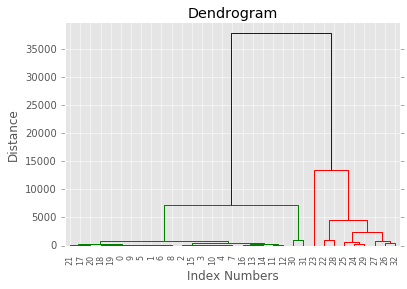

In [67]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

## Extra Trees Classifier

## KNN Classifier